In [1]:
import pandas as pd

import glob

path='c:\\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia'

files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

for f in files:
    print(f)

c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1000000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1000000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1400000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1400000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_400000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_400000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1400000_IF_1000000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1400000_IF_1000000_MF

In [2]:
def group_results(file,name):
    df_temp = pd.DataFrame()
    dict_temp = {}    

    for line in file:
        if 'make' in line:
            continue
        else:
            if ":" in line:
                #print(line.split(':')[1].replace('s',''))
                key, value = line.split(':')[0], float(line.split(':')[1].replace('s',''))
                dict_temp[key] =  float(value)
                #print(key,':',value)
            else: 
                if 'm' in line:
                    key = line.split('\t')[0]
                    mi = int(line.split('\t')[1].split('m')[0])
                    se = float(line.split('\t')[1].split('m')[1].replace('s',''))
                    value = mi*60 + se
                    dict_temp[key] =  float(value)
                    #print(key,':',value)
                    if "sys" in line:
                        df_temp = df_temp.append(dict_temp, ignore_index=True)
                        dict_temp = dict.fromkeys(dict_temp, 0)

    df_temp = df_temp.mean().to_dict()
    
    app = name.split('\\')[-1].split('_')[0]
    Host = name.split('_')[2]
    Host_Freq = int(name.split('_')[4])
    Idle_Freq = int(name.split('_')[6])
   
    if Host == 'A15':
        A15_Freq = Host_Freq
        A7_Freq = Idle_Freq
        
    if Host == 'A7':
        A7_Freq = Host_Freq
        A15_Freq = Idle_Freq
        
    if(int(name.split('_')[10]) == 0):
        dev = 'GPU'
    else:
        dev = Host
        
    GPU_Freq = 600000000.0   
    
    df_temp['App'] = app
    df_temp['Host'] = Host
    df_temp['Dev'] = str(dev)
    df_temp['A15_Freq'] = A15_Freq
    df_temp['A7_Freq'] = A7_Freq
    df_temp['GPU_Freq'] = GPU_Freq
    #df_temp['Idle1_Freq'] = idle1_freq
    #df_temp['Idle2'] = idle2_dev
    #df_temp['Idle2_Freq'] = idle2_freq
    
    return df_temp

In [3]:
df = pd.DataFrame()

for path in files:
    log_data=open(path,'r')
    temp_dict = group_results(log_data, path)
    df = df.append(temp_dict, ignore_index=True)
    col = df['GPU_Freq']
    df.drop(labels=['GPU_Freq'], axis=1,inplace = True)
    df.insert(0, 'GPU_Freq', col)
    col = df['A7_Freq']
    df.drop(labels=['A7_Freq'], axis=1,inplace = True)
    df.insert(0, 'A7_Freq', col)
    col = df['A15_Freq']
    df.drop(labels=['A15_Freq'], axis=1,inplace = True)
    df.insert(0, 'A15_Freq', col)
    col = df['Dev']
    df.drop(labels=['Dev'], axis=1,inplace = True)
    df.insert(0, 'Dev', col)
    col = df['Host']
    df.drop(labels=['Host'], axis=1,inplace = True)
    df.insert(0, 'Host', col)
    col = df['App']
    df.drop(labels=['App'], axis=1,inplace = True)
    df.insert(0, 'App', col)


In [13]:
to_remove = ['App','Host','Dev','A15_Freq','A7_Freq','GPU_Freq','real','sys','user']
df['Total_Acumulada'] = df.loc[:,~df.columns.isin(to_remove)].sum(axis=1)

df['EDP'] = df['Total_Acumulada']*df['real']
df['A15_Power'] = df['A15_Acumulada']/df['real']
df['A7_Power'] = df['A7_Acumulada']/df['real']
df['MEM_Power'] = df['MEM_Acumulada']/df['real']
df['GPU_Power'] = df['GPU_Acumulada']/df['real']
df['A15_Freq'] = (df['A15_Freq'].astype(float) / 1000000).map('{0:g}'.format).astype(str)
df['A7_Freq'] = (df['A7_Freq'].astype(float) / 1000000).map('{0:g}'.format).astype(str)
df['GPU_Freq'] = (df['GPU_Freq'].astype(float) / 1000000000).map('{0:g}'.format).astype(str)
#df = df.sort_values(['A15_Freq','A7_Freq'])
df.loc[:500]


App Host  Dev A15_Freq  A7_Freq GPU_Freq  A15_Acumulada  \
0      2DCONV  A15  GPU    1e-06    1e-06    6e-10       3.359609   
1      2DCONV  A15  A15    1e-06    1e-06    6e-10       4.311673   
2      2DCONV  A15  GPU    1e-06  1.4e-06    6e-10       3.257579   
3      2DCONV  A15  A15    1e-06  1.4e-06    6e-10       4.421417   
4      2DCONV  A15  GPU    1e-06    4e-07    6e-10       3.651329   
..        ...  ...  ...      ...      ...      ...            ...   
496  GRAMSCHM  A15  GPU    2e-06    4e-07    6e-10      66.644520   
497  GRAMSCHM  A15  A15    2e-06    4e-07    6e-10    1540.533000   
498  GRAMSCHM  A15  GPU    4e-07    1e-06    6e-10      10.717892   
499  GRAMSCHM  A15  A15    4e-07    1e-06    6e-10     463.180700   
500  GRAMSCHM  A15  GPU    4e-07  1.4e-06    6e-10       9.611543   

     A7_Acumulada  GPU_Acumulada  MEM_Acumulada  ...      sys       user  \
0        0.393837       0.413309       0.543915  ...   1.1083     4.7077   
1        0.423279       0.404772       0.660535  ...   1.0010     5.7060   
2        0.727040       0.417100       0.515334  ...   1.0839     4.7250   
3        0.821155       0.404862       0.653591  ...   0.9802     5.7242   
4        0.156945       0.549125       0.608304  ...   1.1871     4.7486   
..            ...            ...            ...  ...      ...        ...   
496      1.147869      44.244240      13.312060  ...   0.9434     0.6812   
497     17.645110      26.939430     148.455000  ...  15.0762  1358.4698   
498      2.837745      44.552600      13.465440  ...   2.4659     2.2582   
499     89.170380      64.171520     207.667600  ...  17.3381  3561.2348   
500      5.503921      44.455960      13.361600  ...   2.3670     2.2459   

     Total_Acumulada           EDP  A15_Power  A7_Power  MEM_Power  GPU_Power  \
0          38.642698  2.333092e+02   0.556448  0.065231   0.090088   0.068456   
1          48.225967  2.966813e+02   0.700869  0.068805   0.107371   0.065796   
2          40.254426  2.423558e+02   0.541072  0.120759   0.085595   0.069279   
3          52.184085  3.192831e+02   0.722643  0.134211   0.106824   0.066171   
4          41.382338  2.553952e+02   0.591634  0.025430   0.098565   0.088976   
..               ...           ...        ...       ...        ...        ...   
496      5527.284168  2.325411e+05   1.584078  0.027284   0.316415   1.051644   
497    751188.044581  3.239991e+08   3.571707  0.040910   0.344191   0.062459   
498      3312.200501  1.465788e+05   0.242189  0.064124   0.304275   1.006743   
499    923078.678532  1.031985e+09   0.414301  0.079760   0.185752   0.057399   
500      3370.521585  1.489477e+05   0.217499  0.124548   0.302358   1.005989   

                                        Config            Type  
0        A15: 1 GHz | A7: 1 GHz | GPU: 0.6 GHz     Convolution  
1        A15: 1 GHz | A7: 1 GHz | GPU: 0.6 GHz     Convolution  
2      A15: 1 GHz | A7: 1.4 GHz | GPU: 0.6 GHz     Convolution  
3      A15: 1 GHz | A7: 1.4 GHz | GPU: 0.6 GHz     Convolution  
4      A15: 1 GHz | A7: 0.4 GHz | GPU: 0.6 GHz     Convolution  
..                                         ...             ...  
496    A15: 2 GHz | A7: 0.4 GHz | GPU: 0.6 GHz  Linear Algebra  
497    A15: 2 GHz | A7: 0.4 GHz | GPU: 0.6 GHz  Linear Algebra  
498    A15: 0.4 GHz | A7: 1 GHz | GPU: 0.6 GHz  Linear Algebra  
499    A15: 0.4 GHz | A7: 1 GHz | GPU: 0.6 GHz  Linear Algebra  
500  A15: 0.4 GHz | A7: 1.4 GHz | GPU: 0.6 GHz  Linear Algebra  

[501 rows x 21 columns]

In [5]:
#df1 = df[(df['A15_Freq'] == '1') & (df['A7_Freq'] == '1') & (df['Dev'] == 'A15')]

In [6]:
def Type(x):
    if '2DCONV' in x or '3DCONV' in x:
        return 'Convolution'  
    elif '2MM' in x or '3MM' in x or 'ATAX' in x or 'BICG' in x or 'GEMM' in x or 'GESUMMV' in x or 'GRAMSCHM' in x or 'MVT' in x or 'SYR2K' in x or 'SYRK' in x:
        return 'Linear Algebra' 
    elif 'CORR' in x or 'COVAR' in x:
        return 'Datamining' 
    elif 'FDTD-2D' in x:
        return 'Stencils' 

df['Config'] = 'A15'+': '+df['A15_Freq'].astype(str)+" GHz"+ ' | ' + 'A7'+': '+df['A7_Freq'].astype(str)+" GHz"+' | '+'GPU'+': '+ df['GPU_Freq'].astype(str)+" GHz"
df["Type"] = df["App"].apply(Type)    

In [10]:
apps = list(set(df['App']))
df_config_plot = pd.DataFrame()

for app in apps:
    df_edp = df[df['App'] == app]
    df_edp = df_edp.sort_values('EDP')
    df_edp = df_edp.reset_index()
    
    to_add = []
    for i in range(20):# max 48
        to_add.append(df_edp.iloc[i])
        
    df_config_plot = df_config_plot.append(to_add, ignore_index=True)
    df_config_plot = df_config_plot.drop(columns=['index'])

In [11]:
from plotnine import *
dict_plot = {}
df_config_plot = df_config_plot[df_config_plot['Dev'] == 'A15']
for app in apps:
    dict_plot[app] = (ggplot(df_, aes(x='real', y='Total_Acumulada',fill = 'App', shape = 'Dev')) +\
     geom_point(size = 9) +\
     scale_color_manual(values=("#000000", "#FFFFFF")) +\
     guides(size = False, stroke = False) +\
     guides(colour = False) +\
     labs(x = "Tempo Real ( s )",\
          y = 'Energia Total Acumulada ( J )',\
          title = "All",# + " - " + df_config_plot[df_config_plot['App'] == app]['Type'].iloc[1],\
          subtitle = "teste",\
          fill = 'Apps',\
          shape = 'Devices' ) +\
     #facet_wrap(["App","Type"], scales = "free",ncol=3,nrow=5) +\
     theme_classic() +\
     theme(\
            plot_title = element_text(colour = 'Black', size=15, face = 'bold'),\
            axis_text_x = element_text(angle=0, hjust=0.5,size=15),\
            axis_text_y = element_text(angle=0, hjust=1,size=15),\
            axis_title = element_text(size=14),\
            #legend_position = "bottom",\
            legend_title = element_text(size=14),\
            legend_text = element_text(colour="black", size = 10, face = "normal"))# +\
)

#dict_plot['MVT'].save("MVT_conf_idle_p.png")

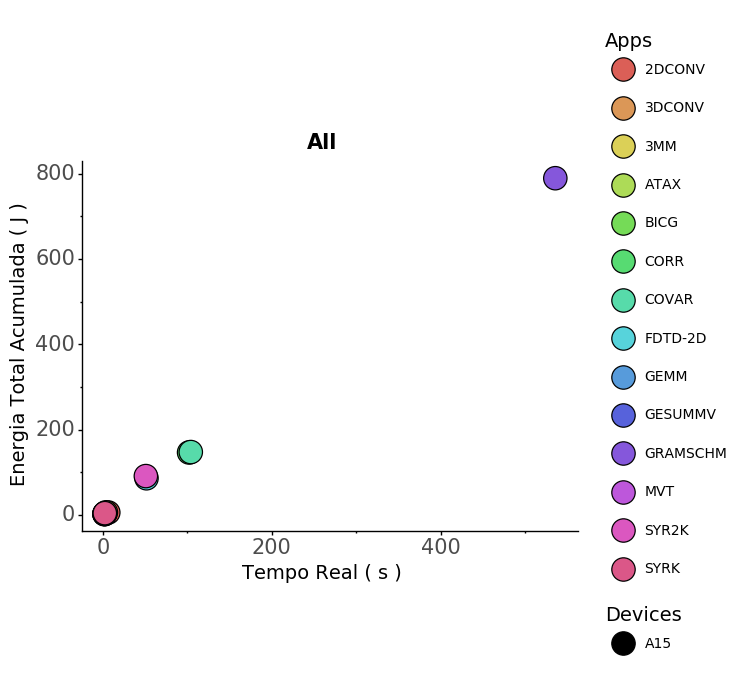

<ggplot: (-9223371858305676470)>


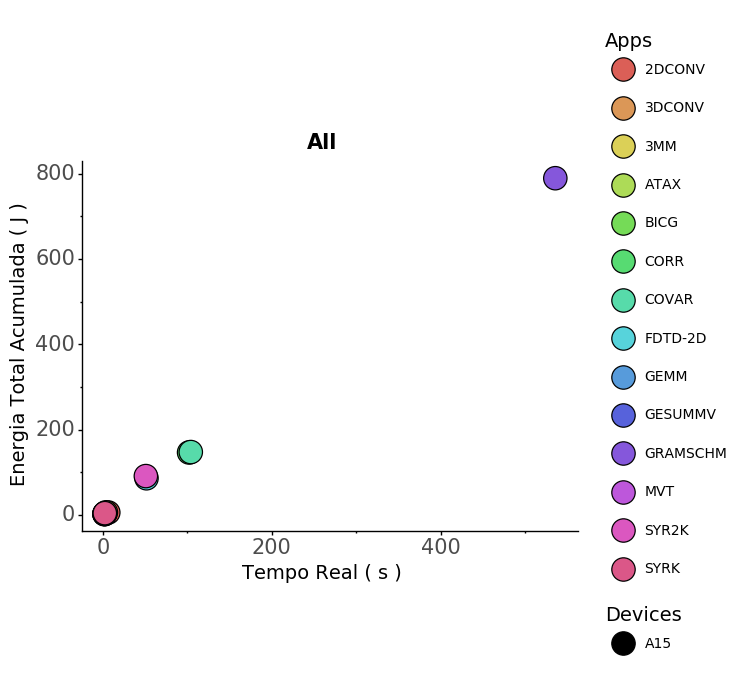

<ggplot: (-9223371858305672644)>


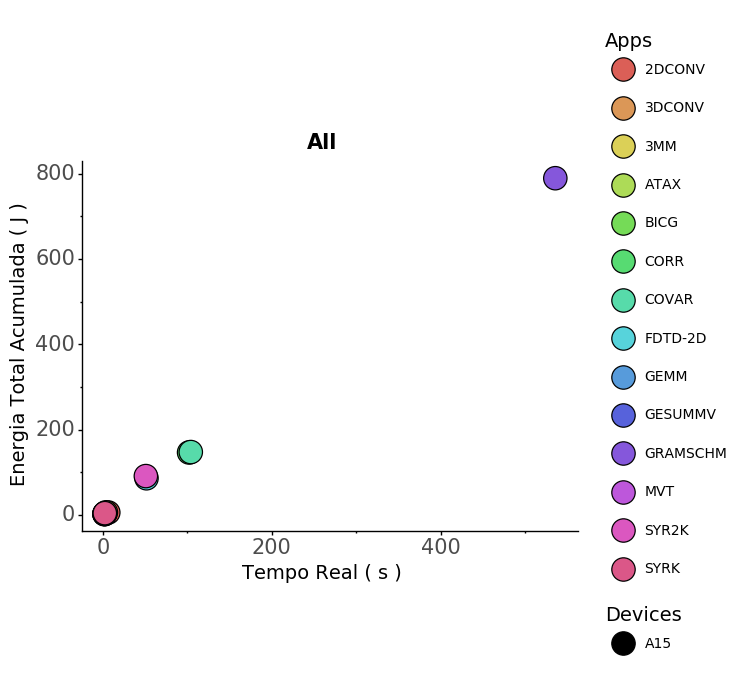

<ggplot: (178549108246)>


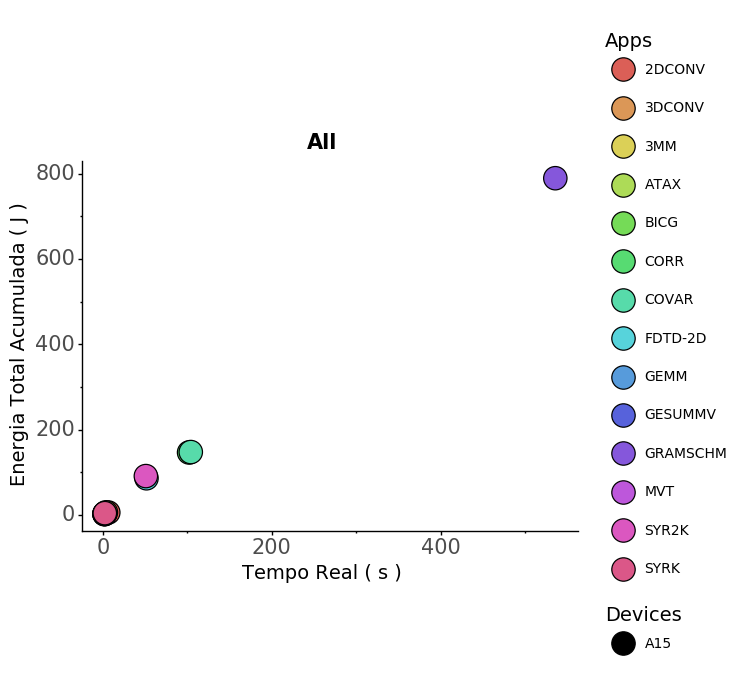

<ggplot: (-9223371858305664312)>


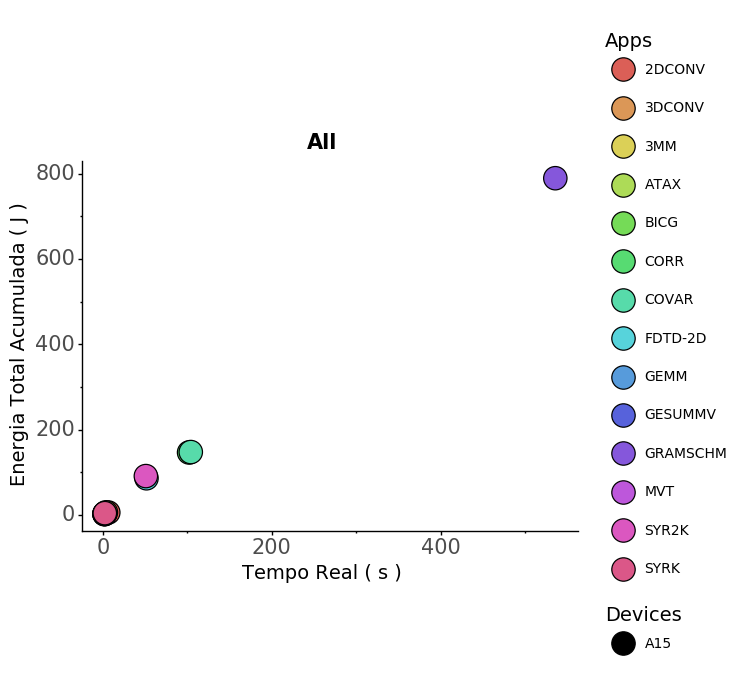

<ggplot: (-9223371858305662562)>


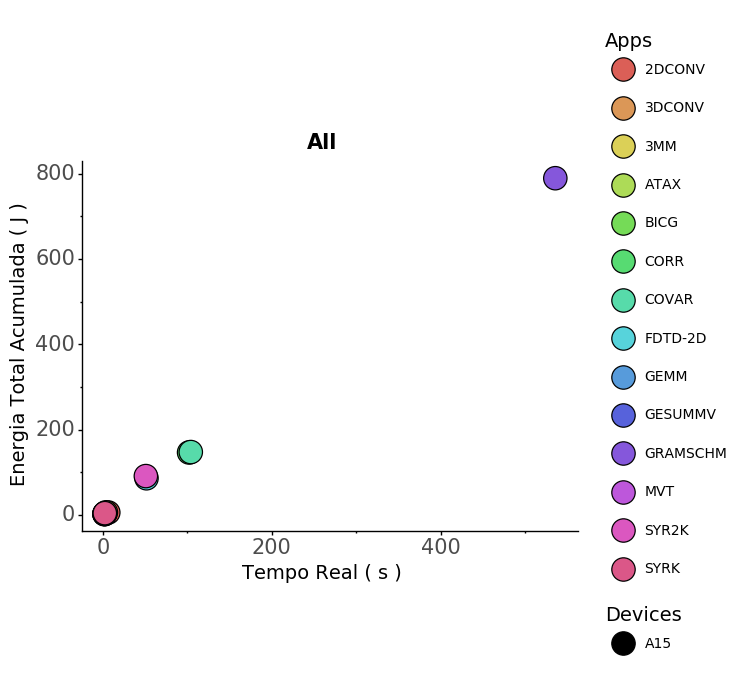

<ggplot: (178549122112)>


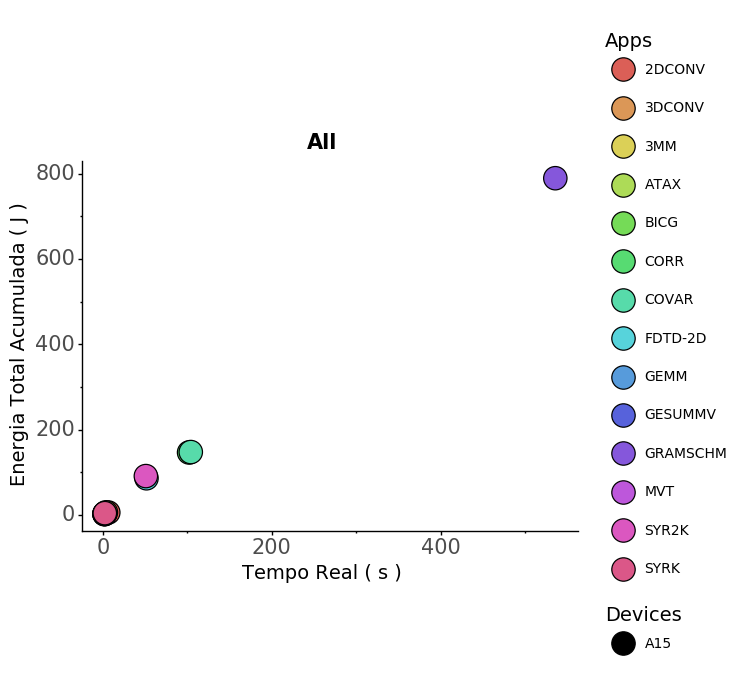

<ggplot: (-9223371858305651950)>


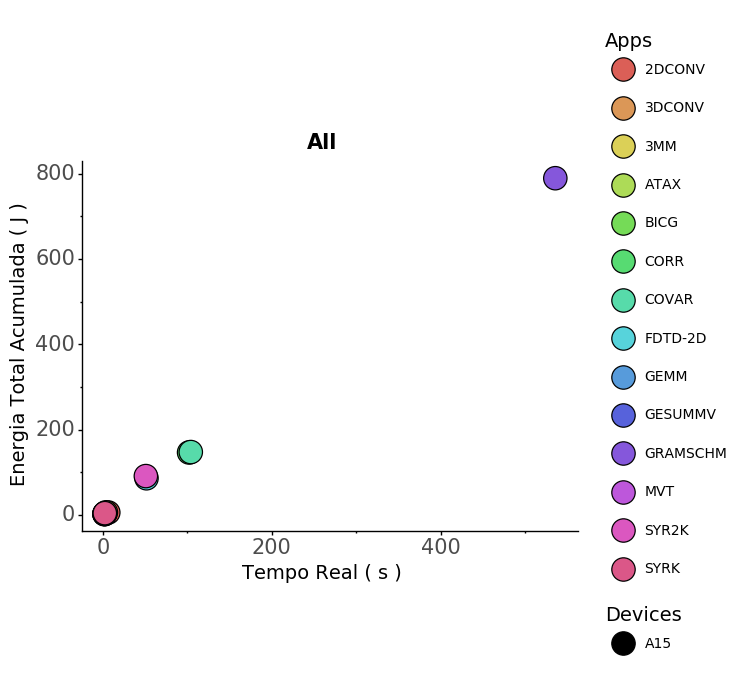

<ggplot: (-9223371858305663407)>


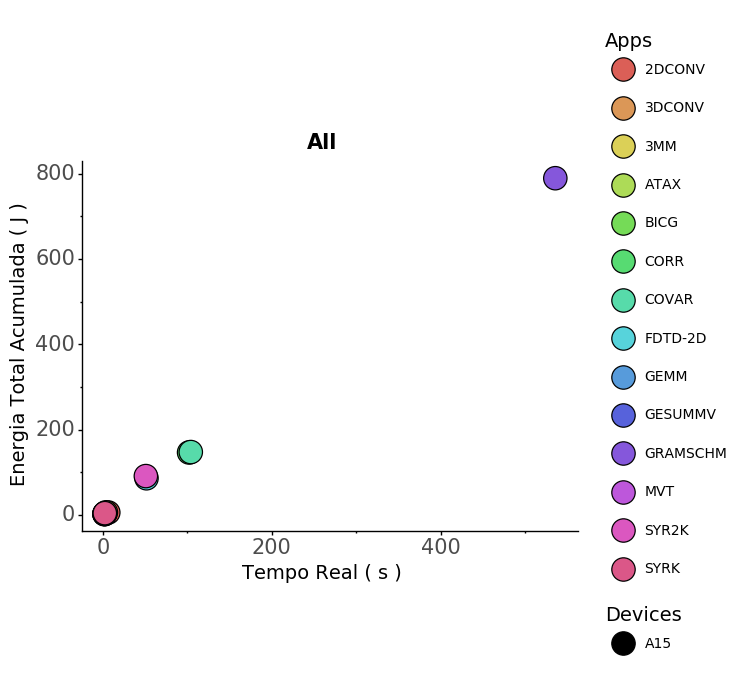

<ggplot: (-9223371858305651922)>


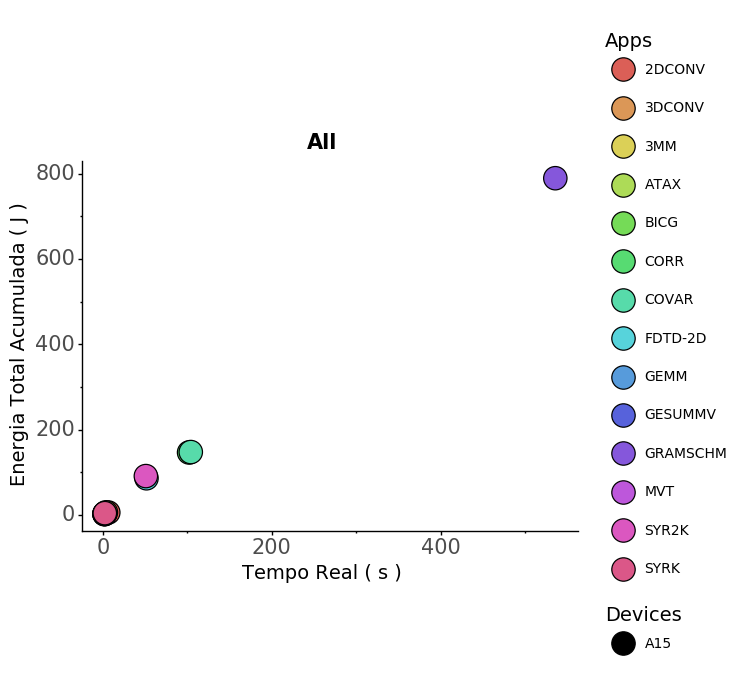

<ggplot: (-9223371858305650744)>


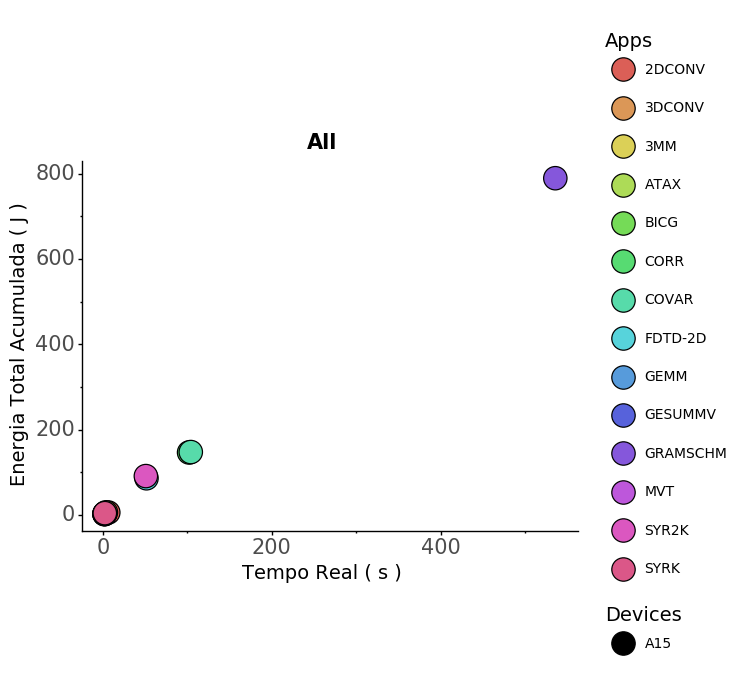

<ggplot: (-9223371858305653269)>


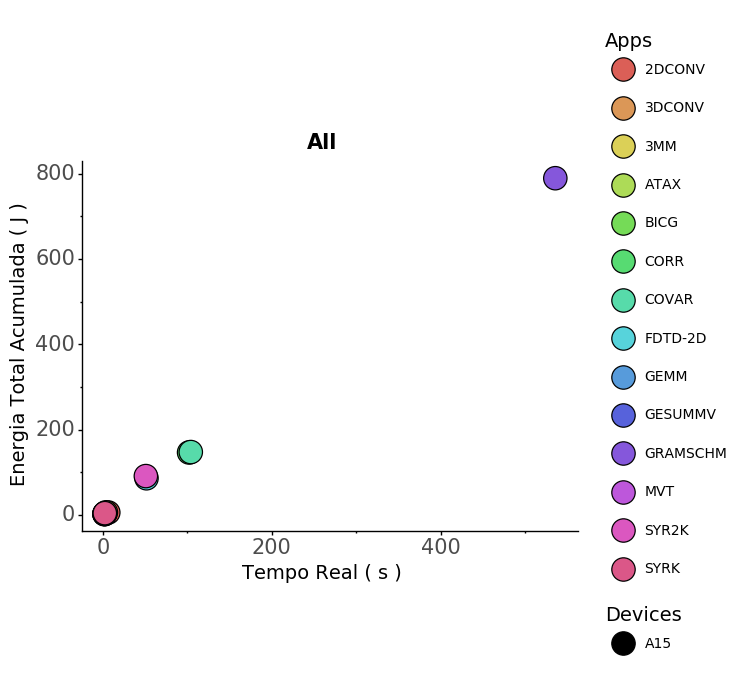

<ggplot: (-9223371858305644540)>


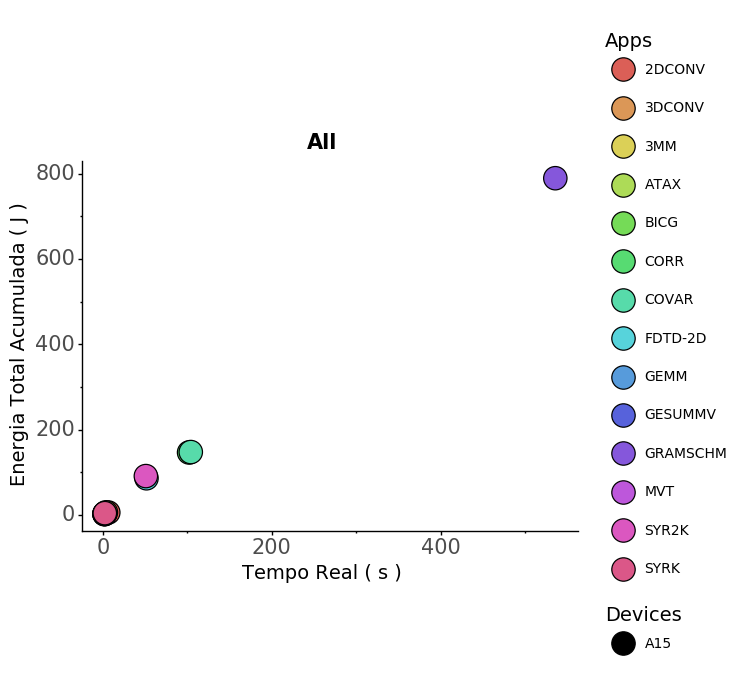

<ggplot: (-9223371858305645638)>


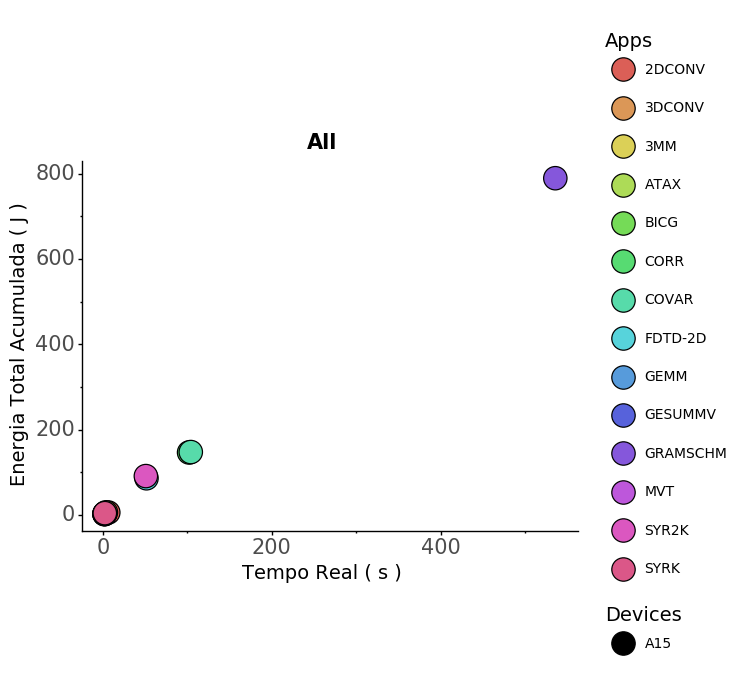

<ggplot: (-9223371858305634044)>


In [12]:
for app in apps:
    print(dict_plot[app])##.save(app + '_idle_p.png')